In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from keras.layers import Dropout, Activation
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
from tensorflow import keras
import cv2
import speech_recognition
import python_speech_features

C:\Users\gogik\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [16]:
#!pip install ffmpeg
#!pip install SpeechRecognition
#!pip install pyttsx3
#!pip install engine
!pip install python-engineio


     ---------------------------------------- 52.9/52.9 kB ? eta 0:00:00


In [2]:
dataset = []
classes = []
up_width = 120
up_height = 40
dictn = {'Ch':0,'Ma':1,'Na':2,'Sh':3,'sa':4,'B':5,'K':6}
for i,j in dictn.items():
  for filename in os.listdir(f'C:/Users/gogik/Downloads/Akshar audio dataset/{i}'):
    song = f'C:/Users/gogik/Downloads/Akshar audio dataset/{i}/{filename}'
    for index in range(2):
      audio,sr = librosa.load(song,res_type='kaiser_fast')
      mfcc_features = librosa.feature.mfcc(y=audio,sr=sr,n_mfcc =50)
      feature_class = i
      up_points = (up_width, up_height)
      X = cv2.resize(mfcc_features, up_points, interpolation= cv2.INTER_CUBIC)
      dataset.append(X)
      classes.append(feature_class)

In [3]:
df = {'Features':dataset,'Class':classes}
extracted_features_df = pd.DataFrame(df)
extracted_features_df.head()

,Features,Class
0,"[[-691.0191, -602.2739, -306.2576, -119.29395,...",Ch
1,"[[-691.0191, -602.2739, -306.2576, -119.29395,...",Ch
2,"[[-625.44684, -611.21826, -575.42096, -410.461...",Ch
3,"[[-625.44684, -611.21826, -575.42096, -410.461...",Ch
4,"[[-621.8084, -567.36804, -242.5147, -159.48584...",Ch


In [4]:
x=np.array(extracted_features_df['Features'].tolist())
y=np.array(extracted_features_df['Class'].tolist())

In [5]:
x.shape,y.shape

((14822, 40, 120), (14822,))

In [6]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
x = x.reshape(x.shape[0], x.shape[1], x.shape[2], 1)
y=to_categorical(labelencoder.fit_transform(y))

In [7]:
x.shape,y.shape

((14822, 40, 120, 1), (14822, 7))

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)

In [9]:
x_train = tf.expand_dims(x_train, axis=-1)

In [10]:
ip=(40,120,1)

In [11]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=ip))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))
opt = keras.optimizers.Adam(learning_rate = 0.001)
model.compile(loss = "categorical_crossentropy", optimizer = opt, metrics = 'acc')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 38, 118, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 19, 59, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 19, 59, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 57, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 28, 64)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 28, 64)         0

In [12]:
batch_size = 32
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=8, verbose=0, mode='auto',
    baseline=None, restore_best_weights=False)

history = model.fit(x_train,y_train ,
            validation_data=(x_test,y_test),
            epochs=15,
            callbacks = [callback],batch_size=batch_size)

Epoch 1/15
371/371 [==============================] - 48s 127ms/step - loss: 1.9973 - acc: 0.2872 - val_loss: 1.4332 - val_acc: 0.4712
Epoch 2/15
371/371 [==============================] - 47s 126ms/step - loss: 1.2559 - acc: 0.5191 - val_loss: 0.8381 - val_acc: 0.7157
Epoch 3/15
371/371 [==============================] - 44s 119ms/step - loss: 0.8586 - acc: 0.6735 - val_loss: 0.5687 - val_acc: 0.8064
Epoch 4/15
371/371 [==============================] - 45s 120ms/step - loss: 0.6299 - acc: 0.7639 - val_loss: 0.4447 - val_acc: 0.8438
Epoch 5/15
371/371 [==============================] - 46s 123ms/step - loss: 0.5035 - acc: 0.8113 - val_loss: 0.3722 - val_acc: 0.8728
Epoch 6/15
371/371 [==============================] - 45s 120ms/step - loss: 0.4182 - acc: 0.8468 - val_loss: 0.2789 - val_acc: 0.9069
Epoch 7/15
371/371 [==============================] - 43s 116ms/step - loss: 0.3524 - acc: 0.8689 - val_loss: 0.2259 - val_acc: 0.9234
Epoch 8/15
371/371 [==============================] - 4

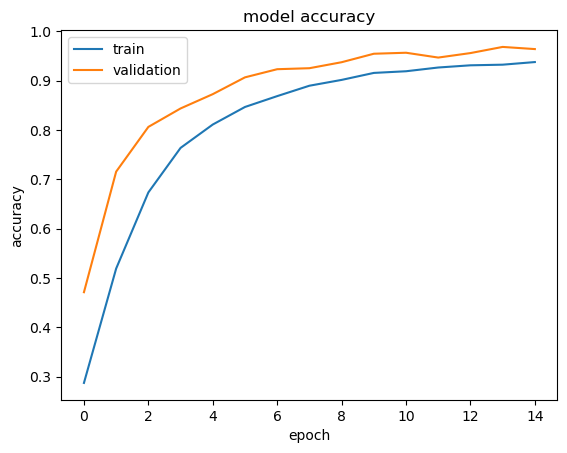

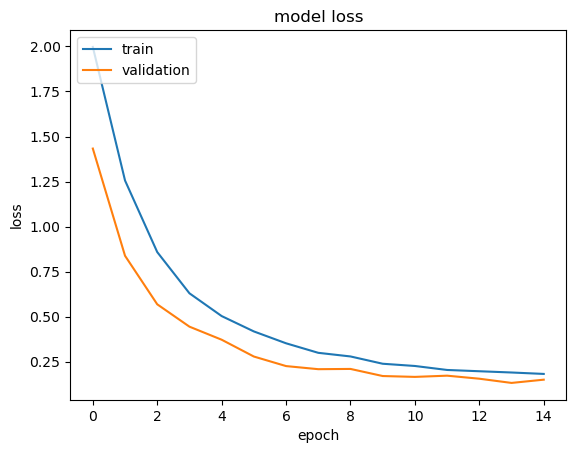

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [14]:
test_accuracy=model.evaluate(x_test,y_test,verbose=0)
print(test_accuracy[1])

0.9642495512962341


In [15]:
y_pred = model.predict(x_test)
y_pred = (y_pred>0.5)
score = model.evaluate(x_test,y_test)
score

93/93 [==============================] - 4s 40ms/step - loss: 0.1505 - acc: 0.9642


[0.15047882497310638, 0.9642495512962341]

In [17]:
import librosa
import cv2
mydict= {'Ch': 0, 'Ma': 1, 'Na': 2, 'Sa': 3, 'Sh': 4,'K':5,'B':6}
audio_path="C:/Users/gogik/Downloads/Akshar audio dataset/K/762.wav"
audio,sr=librosa.load(audio_path,res_type='kaiser_fast')
mfcc_features = np.mean(librosa.feature.mfcc(y=audio,sr=sr,n_mfcc =40).T,axis=0)
X=[]
up_width = 120
up_height = 40
up_points = (up_width, up_height)
x = cv2.resize(mfcc_features, up_points, interpolation= cv2.INTER_LINEAR)
X.append(mfcc_features)

In [16]:
model.save('Akshar_model.h5')

In [17]:
from tensorflow.keras.models import load_model
modelAkshar=load_model('Akshar_model.h5')

In [18]:
modelAkshar.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 38, 118, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 19, 59, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 19, 59, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 57, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 28, 64)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 28, 64)         0

In [19]:
loss,accuracy=modelAkshar.evaluate(x_test,y_test,verbose=1)

93/93 [==============================] - 2s 23ms/step - loss: 0.1505 - acc: 0.9642


In [20]:
converter = tf.lite.TFLiteConverter.from_keras_model(modelAkshar)
converter.experimental_new_converter = True
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
open('Akshar_model.tflite','wb').write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\gogik\AppData\Local\Temp\tmp9eysgwl6\assets


INFO:tensorflow:Assets written to: C:\Users\gogik\AppData\Local\Temp\tmp9eysgwl6\assets


945536